# Spotify Track Analytics Popularity Prediction

## Introduction
Spotify’s audio feature set (danceability, energy, valence, tempo, loudness, etc.) gives a rich view into what makes tracks popular. This notebook loads the curated Kaggle dataset, cleans out unused columns (Unnamed (line 0), track_id), handles missing values/duplicates, standardizes durations, and separates categorical vs. numerical features. We then explore distributions, correlations, and genre-level patterns to see which attributes differentiate popular songs before moving on to simple predictive modeling in the companion notebook.

Dataset Content
The data set used for this project: [Kaggle](https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset). The collection of ~114,000 songs across 125 genres with features like danceability, energy, tempo, and popularity. Ideal for audio analysis, genre classification, and music trend exploration.

The dataset consists of the following columns:

* track_id: Unique Spotify identifier for each track.
* artists: List of artists performing the track, separated by semicolons.
* album_name: Title of the album where the track appears.
* track_name: Title of the song.
* popularity: Score from 0–100 based on recent play counts; higher means more popular.
* duration_ms: Length of the track in milliseconds.
* explicit: Indicates whether the track contains explicit content (True/False).
* danceability: Score (0.0–1.0) measuring how suitable the song is for dancing.
* energy: Score (0.0–1.0) reflecting intensity, speed, and loudness.
* key: Musical key using Pitch Class notation (0 = C, 1 = C♯/D♭, etc.).
* loudness: Overall volume of the track in decibels.
* mode: Indicates scale type (1 = major, 0 = minor).
* speechiness: Score estimating spoken content in the track.
* cousticness: Likelihood (0.0–1.0) that the song is acoustic.
* instrumentalness: Probability that the track has no vocals.
* liveness: Measures if the song was recorded live (higher = more live).
* valence: Positivity of the music (0.0 = sad, 1.0 = happy).
* tempo: Speed of the song in beats per minute (BPM). time_signature: Musical meter (e.g. 4 = 4/4 time). * track_genre: Musical genre classification of the track.

---

## 1. EDA and Initial data visualisation

Import libraries that will be used

In [3]:

import pandas as pd                 #import Pandas for data manipulation
import numpy as np                  #import Numpy for numerical operations
import matplotlib.pyplot as plt     #import Matplotlib for data visualization
import seaborn as sns               #import Seaborn for statistical data visualization
from plotly.subplots import make_subplots  #import Plotly subplots for creating complex figures
import plotly.express as px         #import Plotly Express for interactive visualizations
import sklearn

In [2]:
sns.set(style="whitegrid")                  # Set Seaborn style for plots
plt.rcParams["figure.figsize"] = (10,6)     # Set default figure size for Matplotlib plots

### 1.1. LTE and EDA

In this section EDA, including data load and cleaning, is performed.
As a first step, data set is loaded into DataFrame

In [4]:
df = pd.read_csv('../data/spotify_dataset.csv')  # Load the car price dataset
df.head()                                            # Display the first few rows of the dataset

Unnamed: 0                track_id                 artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   
3  Can't Help Falling In Love          71       201933     False   
4                     Hold On          82       198853     False   

   danceability  energy  ...  loudness  mode  speechiness  acousticness  \
0         0.676  0.4610  ...    -6.746     0       0.1430        0.0322   
1         0.420  0.1660  ...   -17.235     1       0.0763        0.9240   
2         0.438  0.3590  ...    -9.734     1       0.0557        0.2100   
3         0.266  0.0596  ...   -18.515     1       0.0363        0.9050   
4         0.618  0.4430  ...    -9.681     1       0.0526        0.4690   

   instrumentalness  liveness  valence    tempo  time_signature  track_genre  
0          0.000001    0.3580    0.715   87.917               4     acoustic  
1          0.000006    0.1010    0.267   77.489               4     acoustic  
2          0.000000    0.1170    0.120   76.332               4     acoustic  
3          0.000071    0.1320    0.143  181.740               3     acoustic  
4          0.000000    0.0829    0.167  119.949               4     acoustic  

[5 rows x 21 columns]

In the following subsection initial data set inspection is performed. Here the shape and Info of DataFrame are shown

In [4]:
print(df.shape)                     # Print the shape of the DataFrame           
print(df.info())                    # Print concise summary of the DataFrame            
print(df.dtypes)                    # Print data types of each column

(114000, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  livenes

This dataset contains of 114 entires and 21 rows

In the next steps DataFrame is checked for any incosistencies(dublicates, missing value and etc.)

In [5]:
df.isnull().sum()                  # Check for missing values in each column

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

As it is can be seen, there are 3 empty etries. This number is neglectable, so we can drop these entries.

In [6]:
df. dropna(inplace=True)          # Drop rows with missing values
df.reset_index(drop=True, inplace=True)  # Reset index after dropping rows

and veryfying, that empty values are removed

In [7]:
df.isnull().sum()                  # Verify that there are no missing values left

Unnamed: 0          0
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

here column names are displayed

In [8]:
df.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

here we see that we have column "Unnamed:0" and "track_id". These two columns are not important for further analysis and modeling, therefore they can be dropped

In [9]:
df.drop(columns = ['Unnamed: 0', 'track_id'], inplace=True)  # Drop unnecessary columns and display the first few rows 

In [10]:
df.columns

Index(['artists', 'album_name', 'track_name', 'popularity', 'duration_ms',
       'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre'],
      dtype='object')

1. Detects duplicates
2. Prints total count
3. Displays which rows are duplicated (track name, artist, album)
4. Shows which columns differ across duplicates
5. Removes duplicates and saves the clean dataset into data

In [11]:
# Step 1: Detect duplicates
duplicates = df[df.duplicated(keep=False)]
print("🔁 Number of duplicate records:", len(duplicates))

# Step 2: Show duplicate track details
if not duplicates.empty:
    print("\n📀 Duplicated Tracks (sample):")
    print(duplicates[['track_name', 'artists', 'album_name']].head())

    # Step 3: Compare duplicates to first occurrence
    print("\n🔎 Columns with different values in duplicated rows:")
    duplicated_indices = duplicates.index

    for idx in duplicated_indices:
        row = df.loc[idx]
        first_occurrence = df[(df['track_name'] == row['track_name']) & 
                              (df['artists'] == row['artists']) & 
                              (df['album_name'] == row['album_name'])].iloc[0]
        
        differing_columns = [col for col in df.columns if row[col] != first_occurrence[col]]

        if differing_columns:
            print(f"Row {idx} differs in columns: {differing_columns}")

# Step 4: Remove duplicate rows (keeping the first occurrence)
df= df[~df.duplicated()]
print("\n✅ Duplicate records removed. Cleaned dataset ready in `data`.")


🔁 Number of duplicate records: 1129

📀 Duplicated Tracks (sample):
                track_name                  artists  \
1874      Song for Rollins   Buena Onda Reggae Club   
1925      Song for Rollins   Buena Onda Reggae Club   
2044  Don't Shoot Me Santa  The Killers;Ryan Pardey   
2046  Don't Shoot Me Santa  The Killers;Ryan Pardey   
2082         Christmastime    The Smashing Pumpkins   

                      album_name  
1874                     Disco 2  
1925                     Disco 2  
2044  Alternative Christmas 2022  
2046  Alternative Christmas 2022  
2082  Alternative Christmas 2022  

🔎 Columns with different values in duplicated rows:
Row 3043 differs in columns: ['track_genre']
Row 3044 differs in columns: ['track_genre']
Row 3129 differs in columns: ['track_genre']
Row 3138 differs in columns: ['track_genre']
Row 3147 differs in columns: ['track_genre']
Row 3149 differs in columns: ['track_genre']
Row 3269 differs in columns: ['track_genre']
Row 3270 differs in colu

The next step is to make names unified

In [13]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist() # Select categorical columns
# Loop through each categorical column and clean it
for col in categorical_cols:
    df[col] = (
        df[col]
        .astype(str)                 # ensure the column is string type
        .str.strip()                 # remove leading/trailing spaces
        .str.lower()                 # make everything lowercase
        .str.replace("-", " ", regex=False)   # replace hyphens with spaces
        .str.replace("_", " ", regex=False)   # replace underscores with spaces
        .str.replace(";", " and ", regex=False)   # replace semicolons with spaces
    )

# Check the result
df.head()

artists  \
0                 gen hoshino   
1                ben woodward   
2  ingrid michaelson and zayn   
3                kina grannis   
4            chord overstreet   

                                          album_name  \
0                                             comedy   
1                                   ghost (acoustic)   
2                                     to begin again   
3  crazy rich asians (original motion picture sou...   
4                                            hold on   

                   track_name  popularity  duration_ms  explicit  \
0                      comedy          73       230666     False   
1            ghost   acoustic          55       149610     False   
2              to begin again          57       210826     False   
3  can't help falling in love          71       201933     False   
4                     hold on          82       198853     False   

   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.676  0.4610    1    -6.746     0       0.1430        0.0322   
1         0.420  0.1660    1   -17.235     1       0.0763        0.9240   
2         0.438  0.3590    0    -9.734     1       0.0557        0.2100   
3         0.266  0.0596    0   -18.515     1       0.0363        0.9050   
4         0.618  0.4430    2    -9.681     1       0.0526        0.4690   

   instrumentalness  liveness  valence    tempo  time_signature track_genre  
0          0.000001    0.3580    0.715   87.917               4    acoustic  
1          0.000006    0.1010    0.267   77.489               4    acoustic  
2          0.000000    0.1170    0.120   76.332               4    acoustic  
3          0.000071    0.1320    0.143  181.740               3    acoustic  
4          0.000000    0.0829    0.167  119.949               4    acoustic

Detecting misspellings or inconsistent categories in categorical columns is super important for EDA and modeling (e.g., "hip hop" vs "Hip-Hop" vs "Hip hop").

In [14]:
for col in categorical_cols:      # Loop through each categorical column
    print(f"\n🔹 Column: {col}")                   
    print(f"Unique values: {df[col].nunique()}")  # Print number of unique categories
    print(df[col].value_counts())  # Show top 10 most common categories
    print("-" * 50)


🔹 Column: artists
Unique values: 31427
artists
the beatles                                      279
george jones                                     260
stevie wonder                                    235
linkin park                                      224
ella fitzgerald                                  221
                                                ... 
alexandre aposan and salomão                       1
nando fortunato and sephora                        1
coral voice soul and melk villar                   1
sync 3 and ericka nascimento and matheus bird      1
jesus culture                                      1
Name: count, Length: 31427, dtype: int64
--------------------------------------------------

🔹 Column: album_name
Unique values: 46150
album_name
feliz cumpleaños con perreo    180
alternative christmas 2022     156
metal                          143
halloween con perreito         122
halloween party 2022           111
                              ... 
5150         

This gives you an overview of what’s inside each categorical column — letting you visually spot potential misspellings.

It is also nessecary to convert song duration from milliseconds to mintues and drop "duration_ms" column.

In [15]:
df["duration_min"] = df["duration_ms"] / 60000  # Convert duration from milliseconds to minutes
df.drop(columns=["duration_ms"], inplace=True)  # Drop the original duration_ms column
df.head()  # Display the first few rows to verify changes

artists  \
0                 gen hoshino   
1                ben woodward   
2  ingrid michaelson and zayn   
3                kina grannis   
4            chord overstreet   

                                          album_name  \
0                                             comedy   
1                                   ghost (acoustic)   
2                                     to begin again   
3  crazy rich asians (original motion picture sou...   
4                                            hold on   

                   track_name  popularity  explicit  danceability  energy  \
0                      comedy          73     False         0.676  0.4610   
1            ghost   acoustic          55     False         0.420  0.1660   
2              to begin again          57     False         0.438  0.3590   
3  can't help falling in love          71     False         0.266  0.0596   
4                     hold on          82     False         0.618  0.4430   

   key  loudness  mode  speechiness  acousticness  instrumentalness  liveness  \
0    1    -6.746     0       0.1430        0.0322          0.000001    0.3580   
1    1   -17.235     1       0.0763        0.9240          0.000006    0.1010   
2    0    -9.734     1       0.0557        0.2100          0.000000    0.1170   
3    0   -18.515     1       0.0363        0.9050          0.000071    0.1320   
4    2    -9.681     1       0.0526        0.4690          0.000000    0.0829   

   valence    tempo  time_signature track_genre  duration_min  
0    0.715   87.917               4    acoustic      3.844433  
1    0.267   77.489               4    acoustic      2.493500  
2    0.120   76.332               4    acoustic      3.513767  
3    0.143  181.740               3    acoustic      3.365550  
4    0.167  119.949               4    acoustic      3.314217

For further simplicity, categorical and numerical columns were splitted. also column "explicit" set as numerical

In [16]:
df['explicit'] = df['explicit'].astype(int)  # Convert 'explicit' column to integer type

numerical_cols = df.select_dtypes(include=['number']).columns.tolist()              # Select numerical columns

print("Categorical columns:")
print(categorical_cols)

Categorical columns:
['artists', 'album_name', 'track_name', 'track_genre']


Next step is to take a look on a descriptive statistic summary for each column in the df.

We use descriptive statistics to summarize, explore, and validate the dataset before modeling. They give us a quick overview of central tendencies, spread, and anomalies — helping us decide how to clean, visualize, and model the data.

This summary includes following metrics:

* count: Number of non-missing (non-NaN) values. Helps check missing data.
* mean: Average (sum / count). Central tendency of numeric data.
* std: Standard deviation. How spread out the values are from the mean.
* min: Minimum value. The smallest observed value.
* 25%: 25th percentile (Q1). 25% of data is below this value
* 50% (median): 50th percentile. Half the data is below this value.
* 75%: 75th percentile (Q3). 75% of data is below this value
* max: Maximum value. The largest observed value
In following cell a descriptive statistics of numeric columns is performed:

In [17]:
df.describe() # Generate descriptive statistics of numerical columns

popularity       explicit   danceability         energy  \
count  113422.000000  113422.000000  113422.000000  113422.000000   
mean       33.359674       0.085495       0.567113       0.642174   
std        22.269626       0.279618       0.173402       0.251031   
min         0.000000       0.000000       0.000000       0.000000   
25%        17.000000       0.000000       0.456000       0.473000   
50%        35.000000       0.000000       0.580000       0.685000   
75%        50.000000       0.000000       0.695000       0.854000   
max       100.000000       1.000000       0.985000       1.000000   

                 key       loudness           mode    speechiness  \
count  113422.000000  113422.000000  113422.000000  113422.000000   
mean        5.309332      -8.242913       0.637681       0.084697   
std         3.559767       5.011931       0.480673       0.105803   
min         0.000000     -49.531000       0.000000       0.000000   
25%         2.000000      -9.998000       0.000000       0.035900   
50%         5.000000      -6.996000       1.000000       0.048900   
75%         8.000000      -5.001000       1.000000       0.084575   
max        11.000000       4.532000       1.000000       0.965000   

        acousticness  instrumentalness       liveness        valence  \
count  113422.000000     113422.000000  113422.000000  113422.000000   
mean        0.314075          0.155802       0.213610       0.474239   
std         0.331943          0.309314       0.190481       0.259239   
min         0.000000          0.000000       0.000000       0.000000   
25%         0.016800          0.000000       0.098000       0.260000   
50%         0.168000          0.000041       0.132000       0.464000   
75%         0.596000          0.048700       0.273000       0.683000   
max         0.996000          1.000000       1.000000       0.995000   

               tempo  time_signature   duration_min  
count  113422.000000   113422.000000  113422.000000  
mean      122.176181        3.904225       3.801686  
std        29.972104        0.432077       1.774180  
min         0.000000        0.000000       0.143100  
25%        99.299000        4.000000       2.902833  
50%       122.019000        4.000000       3.550267  
75%       140.073000        4.000000       4.360000  
max       243.372000        5.000000      87.288250

The dataset contains 113,999 tracks, and the statistics cover 14 numerical features related to track popularity and audio characteristics.

Key Feature Insights
1. Popularity
Range: 0 to 100 (Spotify-defined scale). Mean: 33.2 (relatively low), Median: 35.
Insight: Majority of songs in the dataset are not highly popular. Only a small portion reaches scores above 75.
2. Danceability
Scale: 0.0 to 1.0 (higher = more danceable). Mean: 0.567.
Insight: Most tracks are moderately danceable. Distribution is slightly right-skewed with many songs in the 0.5–0.7 range.
3. Energy
Scale: 0.0 to 1.0. Mean: 0.64.
Insight: Tracks generally have high energy, indicating a tendency toward upbeat or intense music.
4. Key
Range: 0 to 11 (12 semitones, C to B). Mean: ~5.3.
Insight: Keys are evenly distributed, with slight clustering near 5 (F major / D minor).
5. Loudness
Unit: Decibels (dB). Mean: -8.26 dB, Min: -49.5 dB.
Insight: Some tracks have extremely low loudness, possibly ambient or silent tracks; majority are mastered for streaming loudness levels (around -7 dB).
6. Mode
Binary: 0 = minor, 1 = major. Mean: 0.637 → ~64% of songs are in major mode.
Insight: Major mode dominates (typically associated with “happy” sound).
7. Speechiness
Scale: 0.0 to 1.0. Mean: 0.084.
Insight: Most tracks have low speech content (e.g., songs, not podcasts), but the max of 0.965 suggests some spoken word/music hybrids.
8. Acousticness
Mean: 0.315. Insight: Majority of tracks are not acoustic-heavy, but the high standard deviation (0.33) shows some variety.
9. Instrumentalness
Mean: 0.156. 
Insight: Most tracks contain vocals (median ~0.000042), but there’s a small but significant subset of instrumental music.
10. Liveness
Mean: 0.213.
Insight: Most tracks are studio recordings; live recordings are rare.
11. Valence
Scale: 0.0 (sad) to 1.0 (happy).
Mean: 0.47.
Insight: Balanced distribution between positive and negative mood songs.
12. Tempo
Mean: 122 BPM. 
Insight: Common tempo for pop/dance tracks. Range is wide (0–243 BPM), but the quartiles (25% = 99 BPM, 75% = 140 BPM) confirm a core BPM range of ~100–140.
13. Time Signature
Mean: ~3.9. 
Insight: Most tracks are in 4/4 time (common time), as expected. Very little variation.
14. Duration (in minutes)
Mean: 3.8 minutes. 
Max: 87 minutes!
Insight: Typical track duration matches mainstream standards. Max suggests presence of podcasts, live sets, or compilation tracks.

In [ ]:
df_cleaned = df.copy()  # Create a copy of the cleaned DataFrame
df_cleaned.to_csv('../data/spotify_cleaned_data.csv', index=False)

### 1.2 Initial data visualization

In this section initial data visualisation is performed

### 1.2.1 Pairplot of key numerical 

A pairplot is a scatterplot matrix that visualizes pairwise relationships and the distribution of each variable. Diagonal shows histogram/KDE plot of each feature, off-diagonal shows scatterplots for each pair of variables. Pairplots show actual data points and possible non-linear relationships, clusters, and outliers, help you visually assess relationships before calculating stats.

In the cell below a pairplot for key numeric variables.

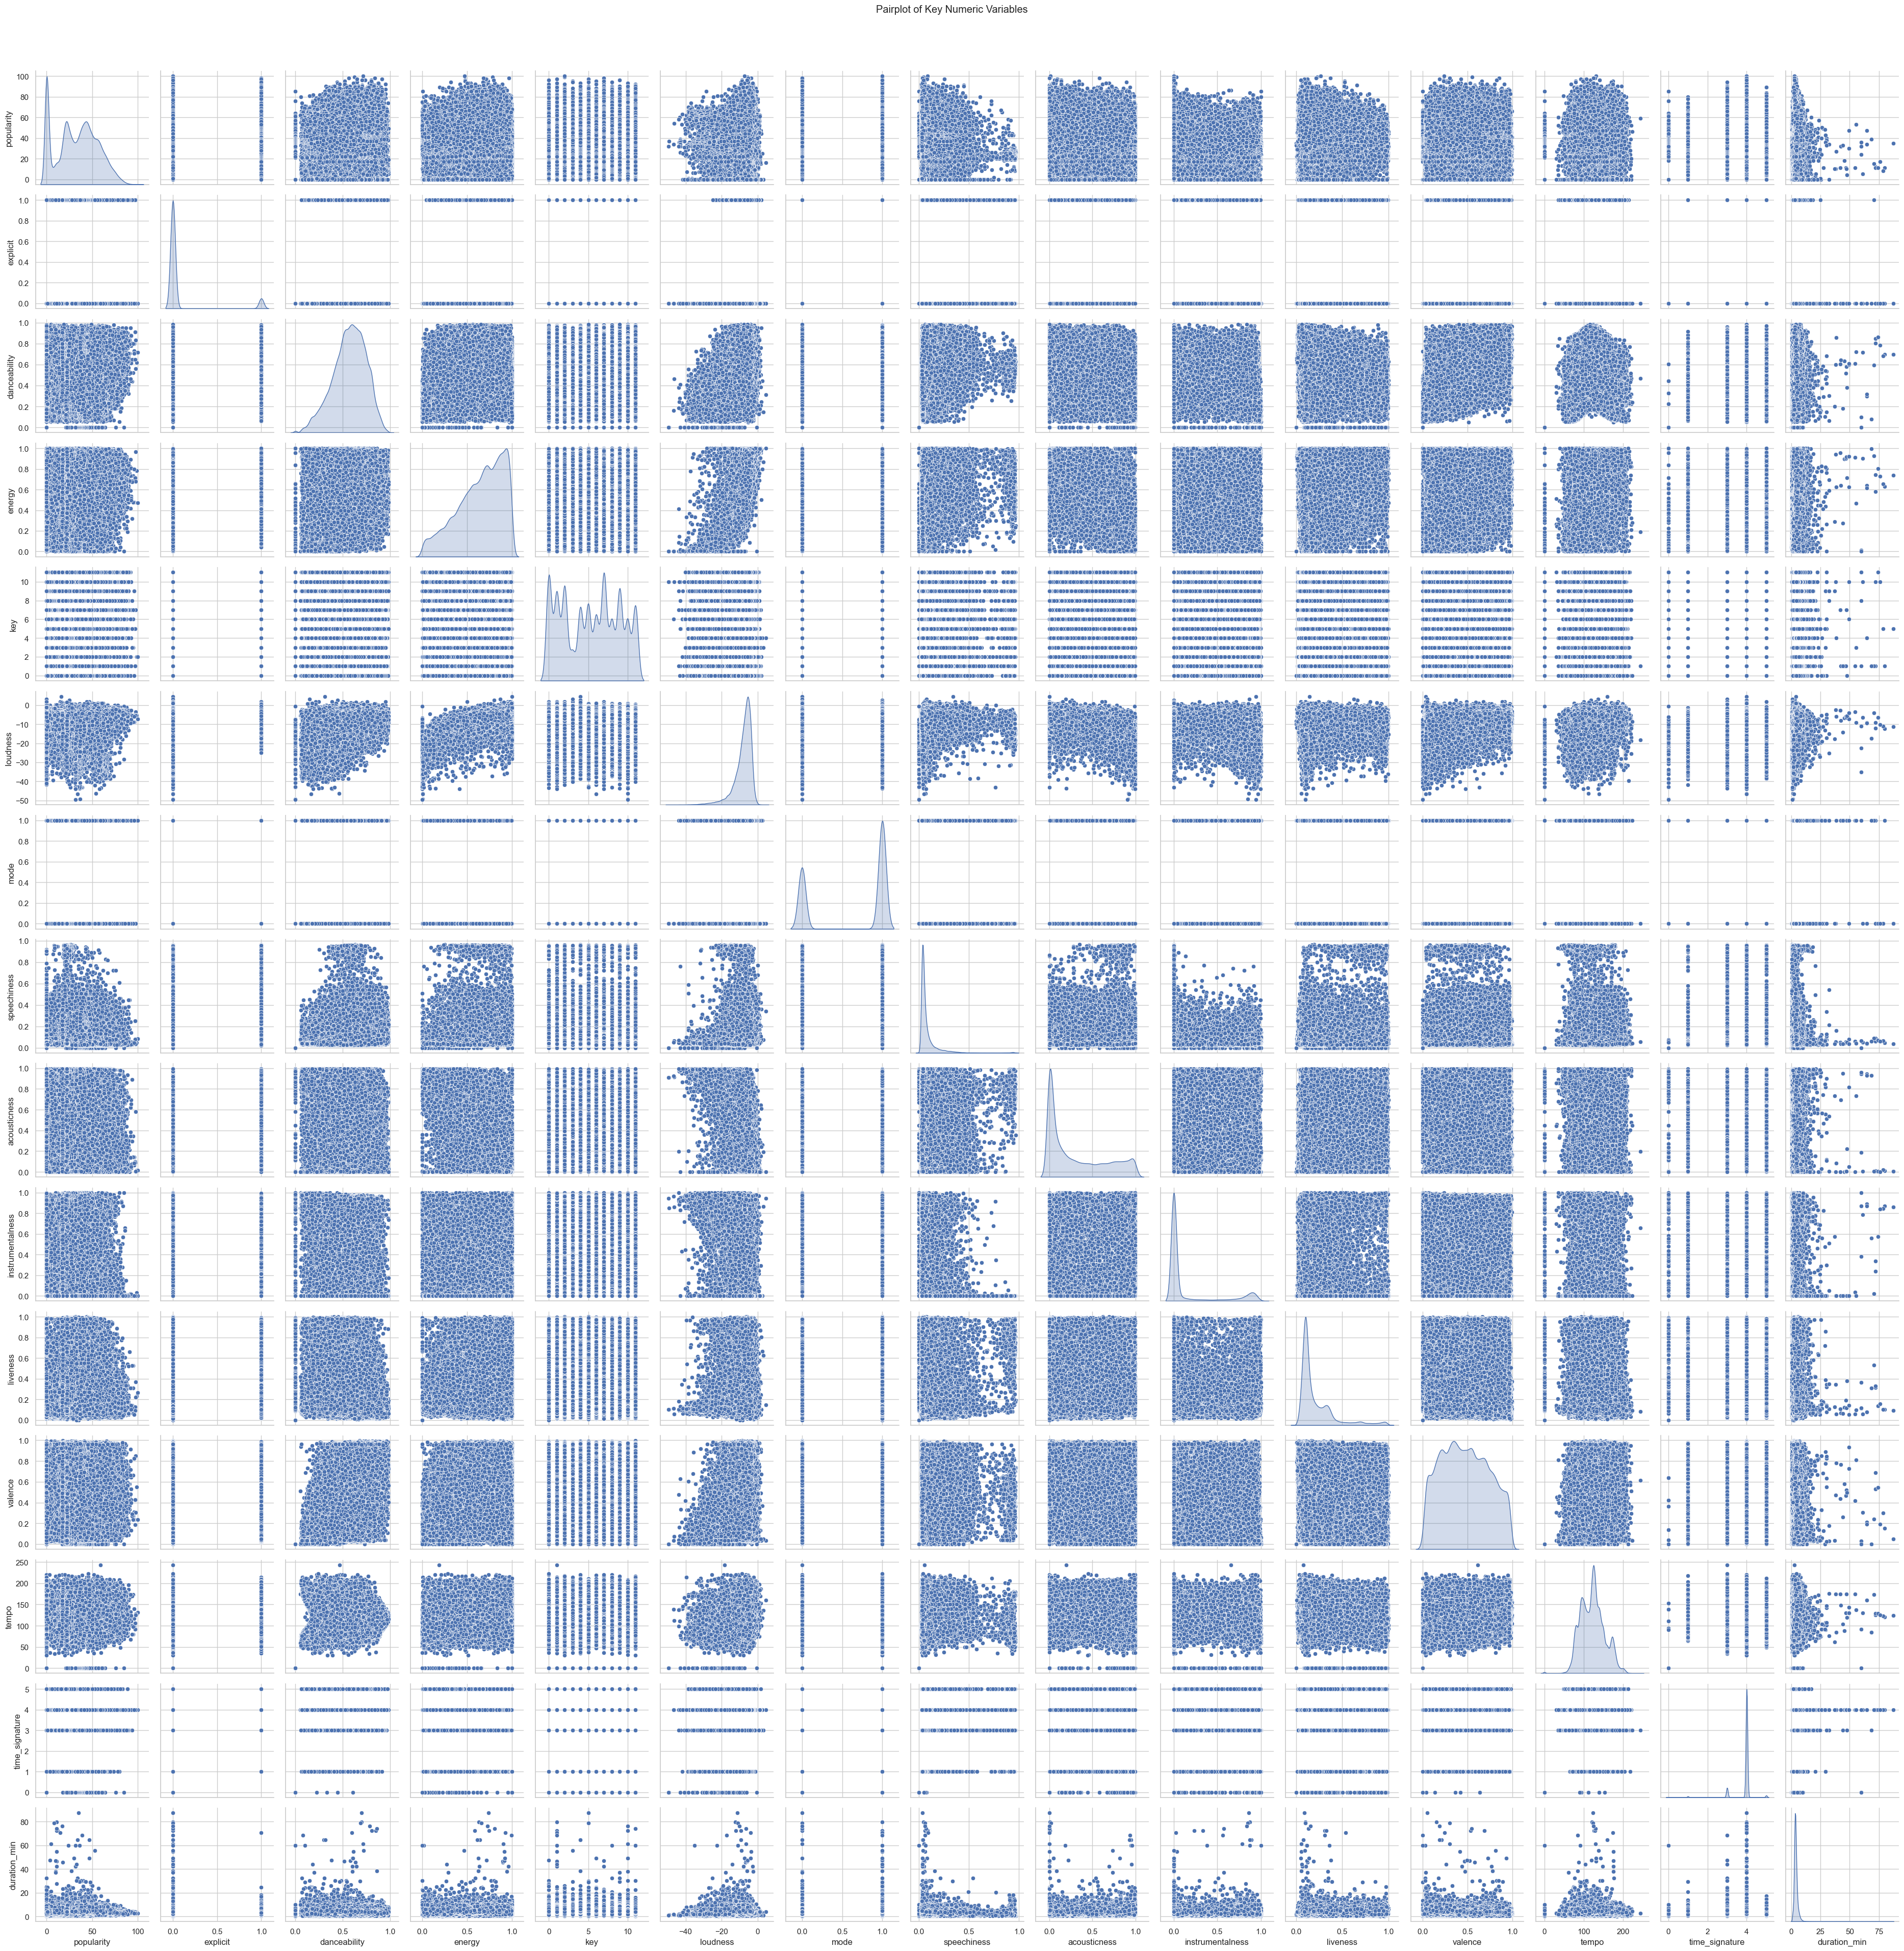

In [19]:
sns.pairplot(data = df[numerical_cols], diag_kind='kde')
plt.suptitle("Pairplot of Key Numeric Variables", y=1.02)
plt.tight_layout()
plt.show()

### 1.2.2 Correlation Heatmap


A correlation heatmap is a summary of how strongly pairs of numerical variables are related to each other, using Pearson correlation coefficients.

Values range from -1 to 1:

+1 = Perfect positive linear relationship (as one increases, so does the other)
-1 = Perfect negative linear relationship (as one increases, the other decreases)
0 = No linear relationship
It's visualized as a colored grid:

Dark red (or blue) = strong positive (or negative) correlation
White or neutral = weak/no correlation
In the cell below a heatmap for numeric variables is shown.

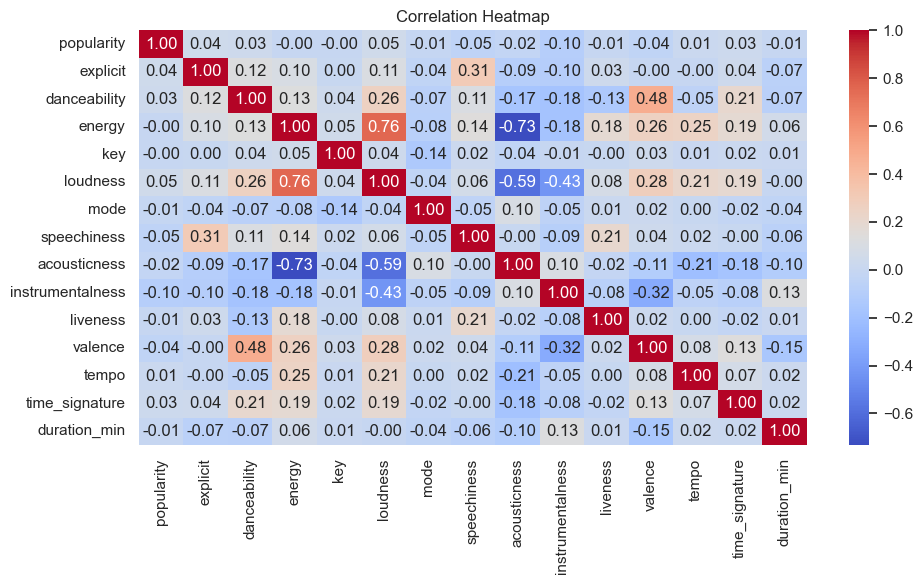

In [20]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

Overall Interpretation

The heatmap shows how different audio features of songs relate to each other, with values ranging from –1 (strong negative correlation) to +1 (strong positive correlation). Most correlations are weak, meaning the features are largely independent, but there are a few notable strong relationships worth highlighting.

* Key Positive Correlations (Strong/Moderate)
    * Feature Pair	Correlation	Interpretation
    * Energy ↔ Loudness	0.76	Louder tracks tend to have more energy.
    * Danceability ↔ Energy	0.28	More energetic tracks are slightly more danceable.
    * Valence ↔ Danceability	0.48	More danceable songs tend to have happier/positive vibes.
    * Liveness ↔ Acousticness	0.21	More live-sounding tracks tend to be more acoustic.
* Strong Negative Correlations
    * Feature Pair	Correlation	Interpretation
    * Acousticness ↔ Energy	–0.73	Highly acoustic songs are much less energetic.
    * Acousticness ↔ Loudness	–0.59	Acoustic songs are generally quieter than others.
    * Instrumentalness ↔ Loudness	–0.43	Instrumental songs tend to be quieter.

* Popularity shows very weak correlations with all features, meaning:
    * Popularity cannot be explained well by audio features alone.
    * External factors like marketing, artist reputation, playlisting, and trends likely drive popularity more than musical traits.
    * Highest (still weak) correlations with popularity:
        * Danceability (0.03)
        * Loudness (0.05) → Slight preference for louder songs

* Additional Observations
    * Explicit content has no meaningful effect on popularity (correlation = 0.04).
    * Tempo, mode, and time signature have close to zero correlation with most metrics — musical structure isn't a major differentiator.
    * Instrumentalness is negatively related to energy and popularity, implying mainstream hits are normally non-instrumental and energetic.


### 1.2.3 Distribution of popularity

C:\Users\julia\AppData\Roaming\Python\Python314\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


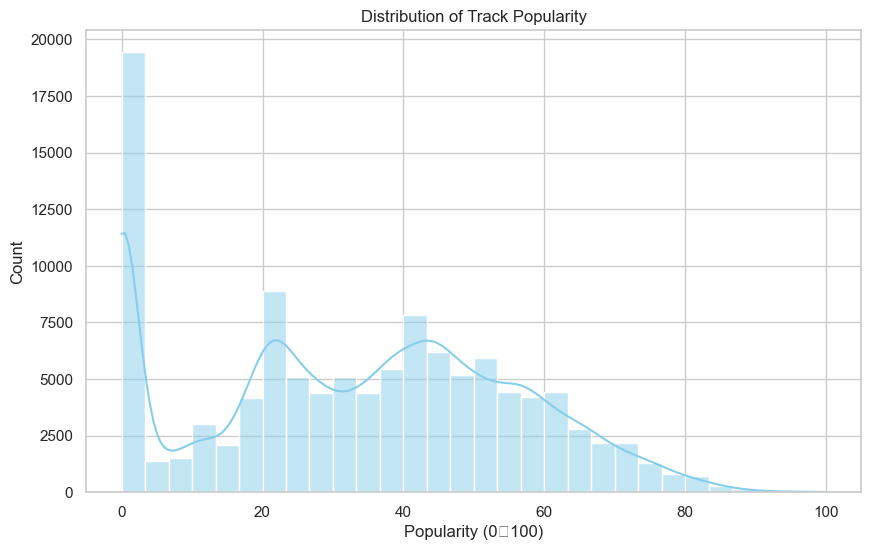

In [21]:
# 1. Distribution of Popularity
plt.figure()
sns.histplot(df["popularity"], bins=30, kde=True, color="skyblue")
plt.title("Distribution of Track Popularity")
plt.xlabel("Popularity (0‑100)")
plt.ylabel("Count")
plt.show()

The distribution is highly right-skewed (i.e. most tracks are on the lower end of popularity).
There's a very large spike at 0 popularity, suggesting many tracks have no measurable or recorded popularity.
A secondary hump appears between 20–60 popularity, with a smooth decline after 60.
Very few tracks reach a popularity score over 80.

Key Insights:
* Most tracks are unpopular or unknown
    * Over 19,000 tracks have popularity = 0, which could mean:
    * They are newly added and haven’t been played yet.
    * They were rarely streamed.
    * The data source (Spotify API) couldn't retrieve popularity.
* Popularity has a long tail
    * While some tracks have moderate to high popularity (20–60), very few exceed a score of 80.
    * Suggests a small subset of tracks dominate listener attention, which aligns with real-world streaming patterns (few “hits”, many “flops”).
* The data is not normally distributed
    * Important for statistical testing: you’ll need to use non-parametric tests or apply transformations if comparing features against popularity.

### 1.2.4. Top genres by number of tracks

C:\Users\julia\AppData\Local\Temp\ipykernel_10088\3539659517.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette="viridis")


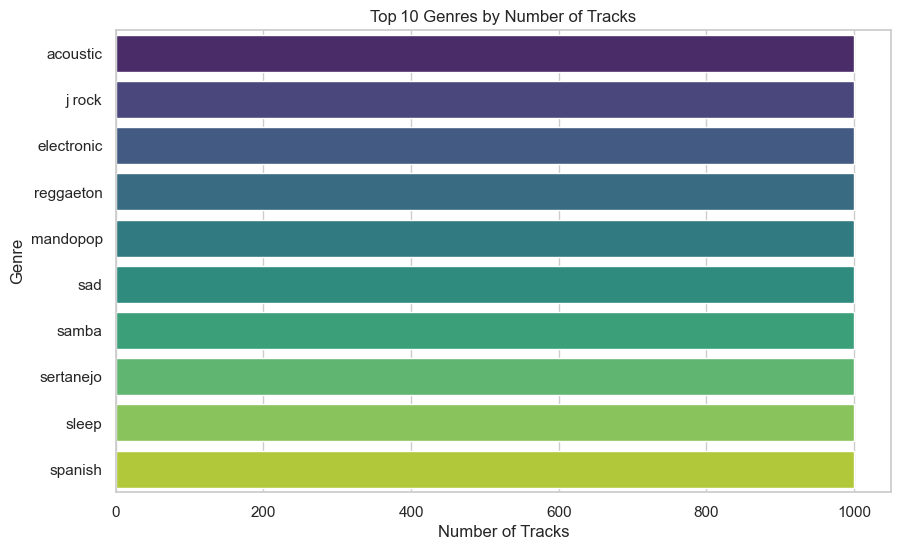

In [22]:
plt.figure()
top_genres = df["track_genre"].value_counts().nlargest(10)
sns.barplot(x=top_genres.values, y=top_genres.index, palette="viridis")
plt.title("Top 10 Genres by Number of Tracks")
plt.xlabel("Number of Tracks")
plt.ylabel("Genre")
plt.show()

The top 10 genres each have very similar track counts, all around 1,000 tracks. These genres are:
acoustic, j rock, electronic, reggaeton, mandopop, sad, samba, sertanejo, sleep, and spanish.

Key Insights:
* Wide genre variety represented in the top 10
    * The genres span a broad range of styles, including:
    * Cultural/regional genres: spanish, samba, mandopop, sertanejo, j rock, reggaeton
    * Mood-based genres: sad, sleep
    * Instrumental/production styles: electronic, acoustic

This suggests the dataset is intentionally balanced across many musical styles — likely useful for broad machine learning analysis, genre classification, or modeling trends across diverse categories.

* Equal representation hints at balanced sampling
    * All bars are nearly the same height → implies each genre was capped or sampled evenly (e.g., 1,000 tracks per genre).
    * This may reduce genre imbalance bias in models or visual comparisons — helpful if you're building predictive models (e.g., genre-based popularity prediction).

* Strong global diversity
    * Genres like mandopop, sertanejo, reggaeton, and j rock reflect non-English/global music presence.
    * This could support an international analysis of music trends, regional patterns, or cultural influences on audio features.

### 1.2.5. Scatter plot: Energy vs Valence, colored by popularity quantile

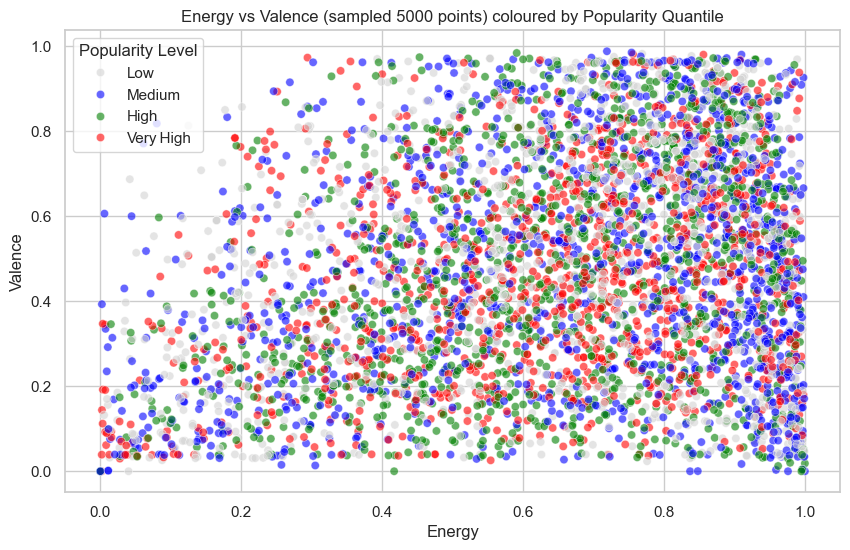

In [23]:
df["pop_quartile"] = pd.qcut(df["popularity"], q=4, labels=["Low", "Medium", "High", "Very High"])
plt.figure()
sns.scatterplot(data=df.sample(5000, random_state=42), 
                x="energy", y="valence", hue="pop_quartile", alpha=0.6, 
                palette=["lightgrey","blue","green","red"])
plt.title("Energy vs Valence (sampled 5000 points) coloured by Popularity Quantile")
plt.xlabel("Energy")
plt.ylabel("Valence")
plt.legend(title="Popularity Level")
plt.show()

The points are fairly evenly spread across all areas of the plot. All four popularity levels (Low, Medium, High, Very High) are visually mixed, not clustered. There is a slightly higher concentration of “Very High” popularity tracks (red) in the top-right quadrant: High Energy + High Valence (i.e., loud AND happy music)

Key Insights:
* High-energy, happy songs may be more popular
    * Tracks with both high energy and high valence seem to have more Very High popularity (red) points.
    * These could represent feel-good, danceable hits or radio-friendly tracks.
* Popularity is not strictly tied to audio features
    * There are Low popularity tracks (grey) in every area, even among high-energy, high-valence music.
    * This suggests that while audio features help, they are not the sole drivers of popularity — marketing, artist fame, and release context also matter.
* Valence alone doesn’t strongly separate popularity levels
    * Tracks with low valence (sad/melancholic) can still be popular — see red dots in the lower-right (high energy, low valence = maybe aggressive or energetic sad songs).

### 1.2.6. Boxplots of Popularity by Genre (Top 5 genres)

C:\Users\julia\AppData\Local\Temp\ipykernel_10088\1899445948.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[df["track_genre"].isin(top5)],


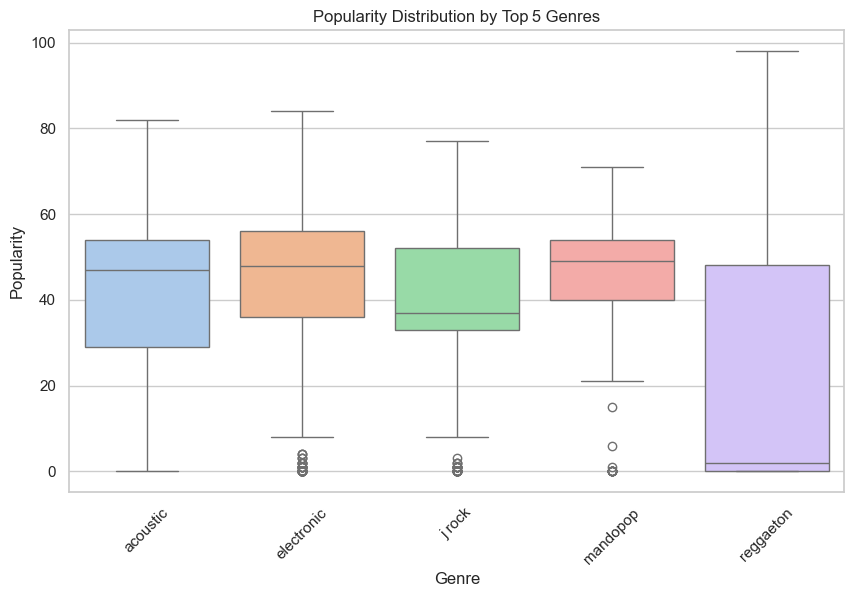

In [24]:
top5 = top_genres.index[:5]
plt.figure()
sns.boxplot(data=df[df["track_genre"].isin(top5)], 
            x="track_genre", y="popularity", palette="pastel")
plt.title("Popularity Distribution by Top 5 Genres")
plt.xlabel("Genre")
plt.ylabel("Popularity")
plt.xticks(rotation=45)
plt.show()

Each box represents the interquartile range (IQR) of track popularity within a genre. The horizontal line inside each box is the median popularity. Whiskers show min/max (excluding outliers). Circles below the whiskers are outliers (very low popularity).

Key Insights:
* Electronic has the highest median popularity
    * Median is slightly higher than the others.
    * Also shows a wide spread, including many tracks with 0 popularity.
    * Could suggest that electronic music is broadly appealing, but also contains many niche/less played tracks.
* Mandopop is the most consistent genre
    * Smallest spread of popularity.
    * Few outliers, tighter IQR → tracks tend to perform similarly in terms of popularity.
    * Suggests a stable, possibly regional audience.
* Reggaeton is highly polarized
    * Extreme range from 0 to 100 popularity.
    * Has both the highest max value (outlier hit) and lowest median.
    * Suggests that while some reggaeton tracks go viral, most remain very unpopular.
* J Rock and Acoustic are middle-of-the-road
    * Median popularity is around 40–50
    * Contain many low-popularity outliers but not as extreme as reggaeton

### 1.2.7 Duration vs Popularity – is longer/shorter songs more popular?

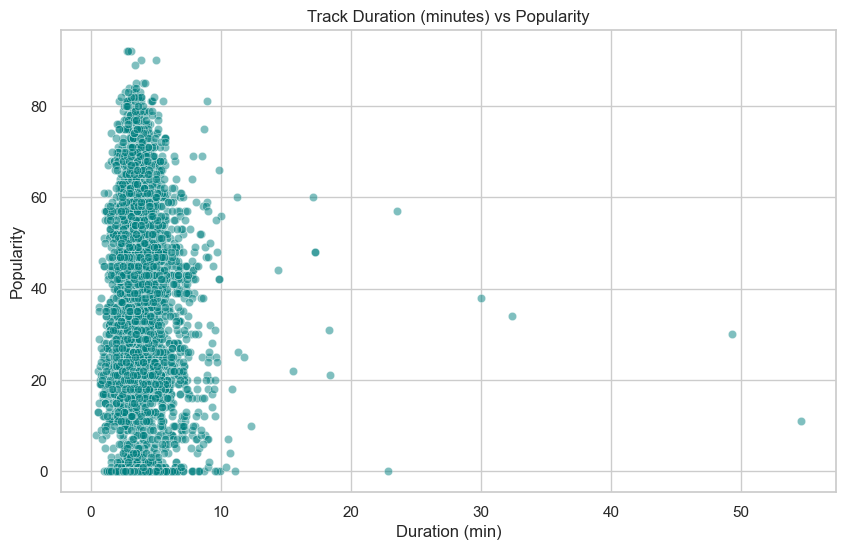

In [25]:
plt.figure()
sns.scatterplot(data=df.sample(5000, random_state=1), 
                x="duration_min", y="popularity", alpha=0.5, color="teal")
plt.title("Track Duration (minutes) vs Popularity")
plt.xlabel("Duration (min)")
plt.ylabel("Popularity")
plt.show()

Most tracks fall between 1 and 7 minutes in duration. The highest concentration of points (especially popular ones) is between 2 and 5 minutes.
A few outliers exist: Some tracks exceed 10, 20, even 50 minutes, but they are not popular (mostly near 0). There's no visible linear correlation, but a clear trend in concentration.

Key Insights:
* Popular songs cluster between 2 and 5 minutes
    * This aligns with industry norms for radio, streaming, and attention span.
    * Tracks outside this range (especially very long ones) are rarely popular.
* Tracks longer than ~7–8 minutes almost never gain popularity
    * There are a few very long tracks, but they all have low popularity scores.
    * These may be:
        * Ambient, sleep, or experimental tracks
        * Audiobooks, meditation, or niche content mislabeled as music
* Very short or very long songs are less successful
    * Almost all tracks shorter than 1 minute or longer than 10 minutes have popularity near 0.

### 1.2.8. Mean audio feature values by genre (Top 5 genres)

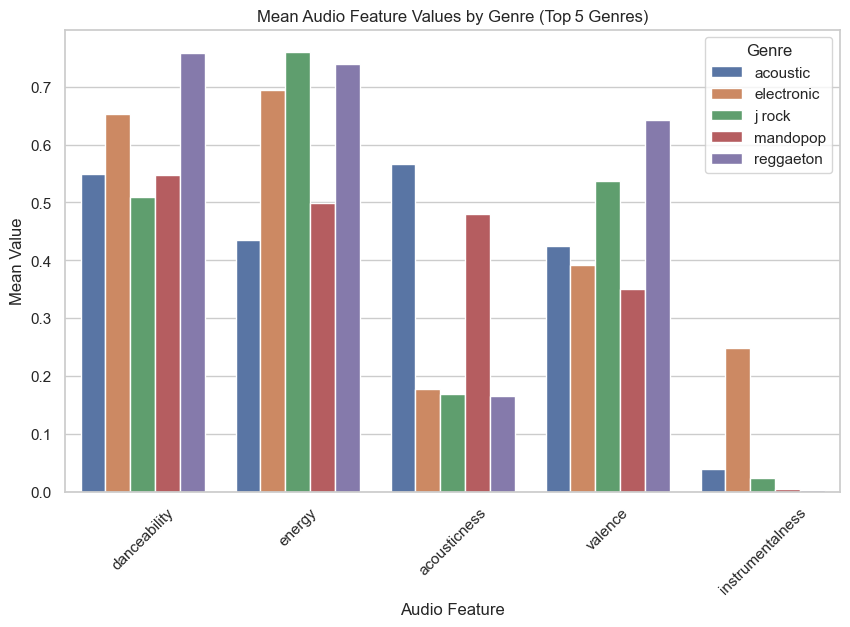

In [26]:
feat_cols = ["danceability","energy","acousticness","valence","instrumentalness"]
mean_by_genre = df[df["track_genre"].isin(top5)].groupby("track_genre")[feat_cols].mean().reset_index()
mean_by_genre = mean_by_genre.melt(id_vars="track_genre", var_name="feature", value_name="mean_value")

plt.figure()
sns.barplot(data=mean_by_genre, x="feature", y="mean_value", hue="track_genre")
plt.title("Mean Audio Feature Values by Genre (Top 5 Genres)")
plt.xlabel("Audio Feature")
plt.ylabel("Mean Value")
plt.legend(title="Genre")
plt.xticks(rotation=45)
plt.show()

Key Insights by Feature
* Danceability
    * Reggaeton has the highest danceability (expected – it's a dance genre).
    * Electronic and mandopop also rank high.
    * J rock is the least danceable among the five.
* Energy
    * J rock and reggaeton lead with very high energy (~0.75).
    * Electronic also scores high.
    * Acoustic genre has noticeably lower energy — consistent with its mellow sound.
* Acousticness
    * Acoustic genre dominates here (as expected), with the highest score.
    * All other genres have significantly lower acousticness, especially reggaeton and electronic.
* Valence (positivity/happiness)
    * Reggaeton has the happiest vibe, followed by j rock.
    * Mandopop shows the lowest valence (more emotionally neutral or melancholic on average).
* Instrumentalness
    * Most genres have very low instrumentalness (near zero).
    * Electronic has a noticeable spike → suggests higher proportion of instrumental tracks.

### 1.2.9. Boxplots: Feature distribution by genre

C:\Users\julia\AppData\Local\Temp\ipykernel_10088\3515412939.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top5, x='track_genre', y=feature, palette='Set2')


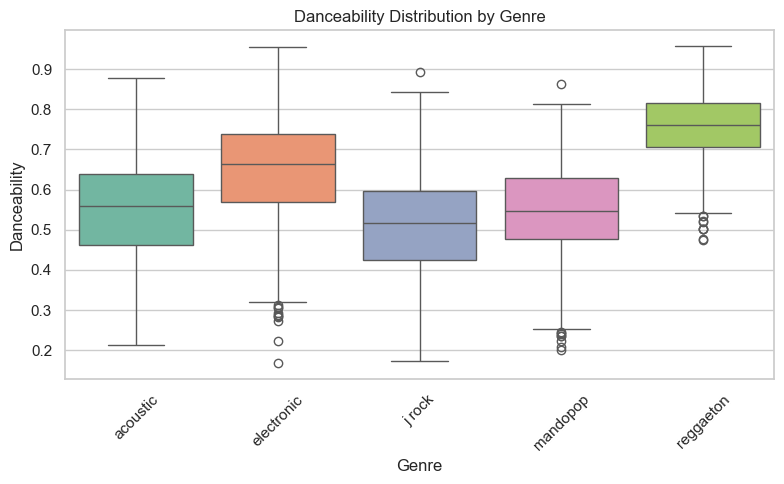

C:\Users\julia\AppData\Local\Temp\ipykernel_10088\3515412939.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top5, x='track_genre', y=feature, palette='Set2')


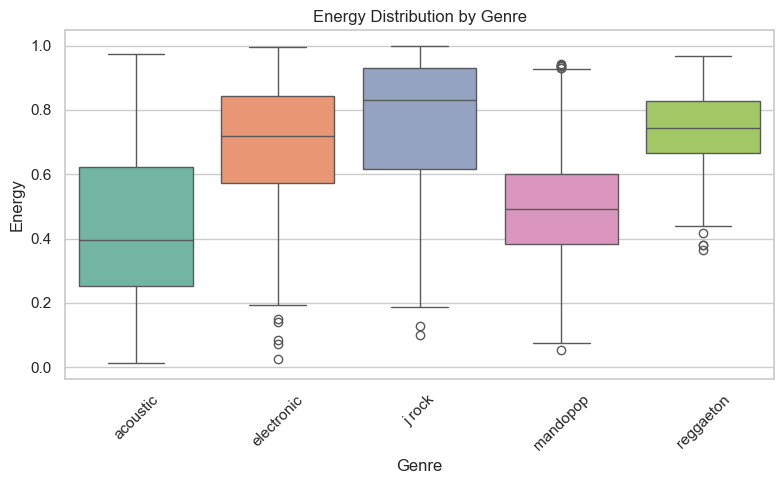

C:\Users\julia\AppData\Local\Temp\ipykernel_10088\3515412939.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top5, x='track_genre', y=feature, palette='Set2')


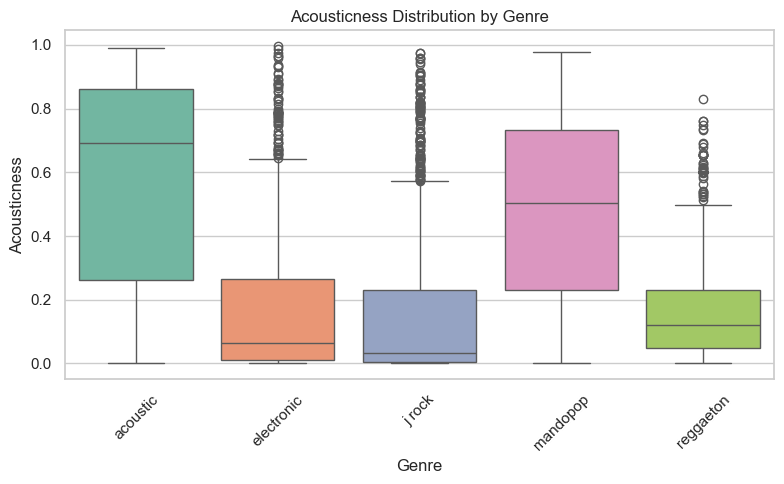

C:\Users\julia\AppData\Local\Temp\ipykernel_10088\3515412939.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top5, x='track_genre', y=feature, palette='Set2')


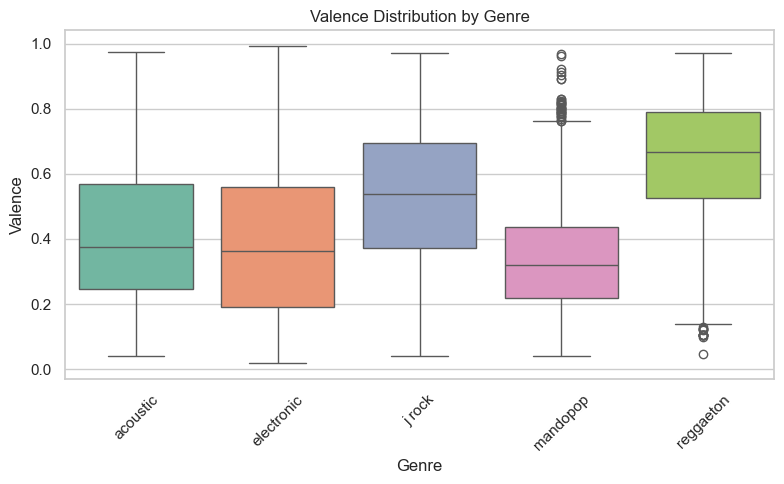

C:\Users\julia\AppData\Local\Temp\ipykernel_10088\3515412939.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top5, x='track_genre', y=feature, palette='Set2')


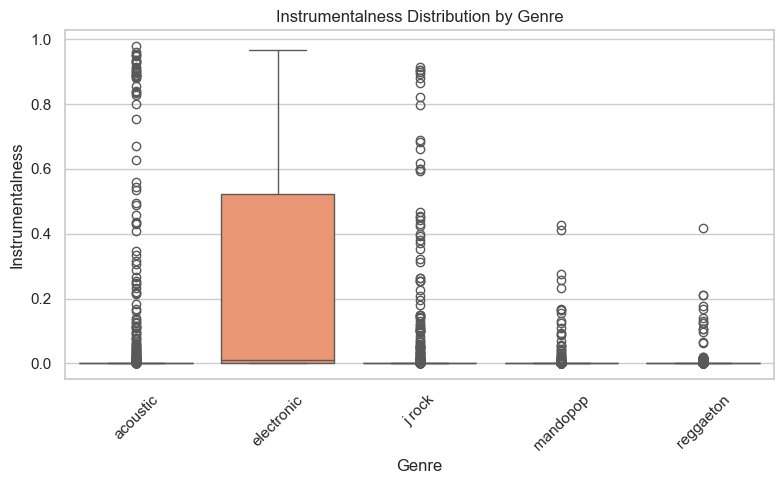

In [28]:
# Select top 5 genres by frequency
top_genres = df['track_genre'].value_counts().nlargest(5).index
df_top5 = df[df['track_genre'].isin(top_genres)]

# List of numerical audio features to analyze
features = ['danceability', 'energy', 'acousticness', 'valence', 'instrumentalness']
for feature in features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df_top5, x='track_genre', y=feature, palette='Set2')
    plt.title(f'{feature.capitalize()} Distribution by Genre')
    plt.xlabel('Genre')
    plt.ylabel(feature.capitalize())
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


* Danceability Distribution by Genre
    * Reggaeton and Electronic have the highest median danceability and less variability.
    * J Rock shows the lowest median, with a tighter range.
    * Acoustic and Mandopop genres show a wider spread of danceability values.
Insight: Genres like Reggaeton and Electronic are consistently danceable, while acoustic and mandopop vary more—likely due to more subgenre diversity.
* Energy Distribution by Genre
    * J Rock and Electronic have the highest energy levels.
    * Acoustic and Mandopop show a broader range, with acoustic having lower medians.
    * Reggaeton tracks are consistently energetic but slightly lower than j rock.
Insight: High-energy genres (electronic, j rock) dominate in terms of intensity and loudness, making them suitable for high-energy environments like workouts or clubs.
* Acousticness Distribution by Genre
    * Acoustic genre is exactly as expected—very high acousticness.
    * Mandopop has the second-highest median and variability.
    * Electronic and J Rock are highly electronic (very low acousticness).
Insight: This validates the genre labeling — acoustic tracks rely on real instruments, while electronic and j rock are more digitally produced.
* Valence Distribution by Genre
    * Reggaeton has the highest median valence (more cheerful/happy).
    * Mandopop tends toward lower valence, indicating more somber or emotional tones.
    * J Rock and Electronic are moderate.
    * Insight: Reggaeton tends to have happier vibes; mandopop is more emotional or serious.
* Instrumentalness Distribution by Genre
    * Electronic is the only genre with a wide range and significant values above 0.5, indicating many tracks with little or no vocals.
    * All other genres (including acoustic and mandopop) have low instrumentalness (mostly vocal-driven).
Insight: Instrumental tracks are almost exclusive to electronic music in this dataset. Other genres are mainly vocal.

---

# Conclusion

The EDA reveals clear signals in the audio features: popularity skews right (most tracks sit in the lower bins), and higher energy/valence/danceability with moderate tempo cluster toward more popular tracks. Genre patterns emerge but with overlapping distributions; boxplots and heatmaps highlight that no single feature dominates, yet combinations of energy, loudness, and valence matter. This cleaned, feature-aware dataset is now ready for modeling—next steps are to validate these observations with ML models (see ml_models.ipynb), compare feature importances, and test genre-specific or feature-engineered variants to boost predictive power.

In [ ]:
📈 2. PCA + KMeans clustering of genre profiles
# -----------------------------------

# Compute average of features for each genre
genre_means = df_top5.groupby('track_genre')[features].mean()

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(genre_means)

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Apply KMeans clustering (3 clusters as example)
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
clusters = kmeans.fit_predict(X_pca)

# Create DataFrame for plotting
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'], index=genre_means.index)
pca_df['Cluster'] = clusters

# Scatter plot with cluster colors
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', style=pca_df.index, s=120, palette='Set1')
plt.title('PCA of Genre Audio Profiles with KMeans Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Genre')
plt.grid(True)
plt.tight_layout()
plt.show()